<h2>Preprocess data for prediction & The Linear Regression Model and Random Forest Model are used to predict yearly rent median of next 5 years.</h2>

<h2>Preprocess data</h2>

<h4>process 2023 dataframe</h4>

In [1]:
import pandas as pd
newrent_df = pd.read_csv('../data/curated/rent_cleaned.csv')

# ensure price_per_week is numerical
newrent_df['price_per_week'] = pd.to_numeric(newrent_df['price_per_week'], errors='coerce')

# group by postcode, give median and count
grouped_data = newrent_df.groupby('postcode').agg(
    YearlyMedian=('price_per_week', 'median'),
    YearlyCount=('price_per_week', 'count')
).reset_index()

# Get the unique correspondence between postcode and suburb
postcode_suburb = newrent_df[['postcode', 'suburb']].drop_duplicates()

# merge suburb name to grouped_data 
final_data = pd.merge(grouped_data, postcode_suburb, on='postcode', how='left')

# Sort the results by suburb
final_data = final_data[['suburb', 'postcode', 'YearlyCount', 'YearlyMedian']]

print(final_data)
final_data.to_csv('../data/curated/2023-24_rent_cleaned_postcode.csv', index=False)

              suburb  postcode  YearlyCount  YearlyMedian
0          Melbourne      3000          220         630.0
1     East Melbourne      3002            6         694.5
2     West Melbourne      3003           22         650.0
3          Melbourne      3004           27         600.0
4          Southbank      3006           87         695.0
..               ...       ...          ...           ...
526      Pioneer Bay      3984            1         350.0
527        Wonthaggi      3995            3         440.0
528  North Wonthaggi      3995            3         440.0
529         Kilcunda      3995            3         440.0
530        Inverloch      3996            1         460.0

[531 rows x 4 columns]


In [2]:
# combined 2 dataset
import pandas as pd
df1 = pd.read_csv("../data/curated/training_data_raw.csv")
df2 = pd.read_csv('../data/curated/2023-24_rent_cleaned_postcode.csv')

df2.rename(columns={
    'YearlyCount': '2023.5_rent_count',
    'YearlyMedian': '2023.5_rent_median'
}, inplace=True)

comb_df = pd.merge(df1, df2, how='left', on=['suburb', 'postcode'])
comb_df.head()

,suburb,postcode,SA2,SA2 NAME,geometry,2000_rent_count,2000_rent_median,2001_rent_count,2001_rent_median,2002_rent_count,...,2017_income,2018_income,2019_income,2020_income,average_income,income_growth_rate,affluence_index,geometry.1,2023.5_rent_count,2023.5_rent_median
0,Albert Park-Middle Park-West St Kilda,3004.0,206041119,East Melbourne,POLYGON ((144.9739585748236 -37.81330241814959...,4632.0,266.25,4990.0,281.25,4097,...,71759.0,75755.0,77804.0,81648.0,75287.0,0.175316,52700.952595,POLYGON ((144.9739585748236 -37.81330241814959...,NaN,NaN
1,Albert Park-Middle Park-West St Kilda,3004.0,206041125,South Yarra - West,POLYGON ((144.97455041239857 -37.8346653683224...,4632.0,266.25,4990.0,281.25,4097,...,68512.0,70451.0,69578.0,72567.0,69194.6,0.118739,48436.255622,POLYGON ((144.97455041239857 -37.8346653683224...,NaN,NaN
2,Albert Park-Middle Park-West St Kilda,3004.0,206051128,Albert Park,POLYGON ((144.96766973330057 -37.8373669078686...,4632.0,266.25,4990.0,281.25,4097,...,66627.0,67518.0,68933.0,73107.0,68307.4,0.118665,47815.215600,POLYGON ((144.96766973330057 -37.8373669078686...,NaN,NaN
3,Albert Park-Middle Park-West St Kilda,3004.0,206051513,St Kilda - Central,POLYGON ((144.9822465081365 -37.86154000901546...,4632.0,266.25,4990.0,281.25,4097,...,56940.0,59644.0,60523.0,64644.0,59043.0,0.209113,41330.162734,POLYGON ((144.9822465081365 -37.86154000901546...,NaN,NaN
4,Armadale,3143.0,206061135,Armadale,POLYGON ((145.01167433388778 -37.8535692509816...,2947.0,203.75,2904.0,222.50,2330,...,66098.0,69563.0,72012.0,73321.0,68858.0,0.158383,48200.647515,POLYGON ((145.01167433388778 -37.8535692509816...,6.0,477.5


In [3]:
df_filtered = comb_df.loc[:, ~comb_df.columns.str.contains('count')]
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.contains('median_growth')]
# df_filtered.drop(columns=['SA2 code', 'SA2 name','average_income', 'income_growth_rate', 'population_growth_rate','suburb', 'affluence_index', 'geometry','SA2', 'SA2 NAME'],inplace=True)
df_filtered.columns

Index(['suburb', 'postcode', 'SA2', 'SA2 NAME', 'geometry', '2000_rent_median',
       '2001_rent_median', '2002_rent_median', '2003_rent_median',
       '2004_rent_median', '2005_rent_median', '2006_rent_median',
       '2007_rent_median', '2008_rent_median', '2009_rent_median',
       '2010_rent_median', '2011_rent_median', '2012_rent_median',
       '2013_rent_median', '2014_rent_median', '2015_rent_median',
       '2016_rent_median', '2017_rent_median', '2018_rent_median',
       '2019_rent_median', '2020_rent_median', '2021_rent_median',
       '2022_rent_median', '2001_population', '2002_population',
       '2003_population', '2004_population', '2005_population',
       '2006_population', '2007_population', '2008_population',
       '2009_population', '2010_population', '2011_population',
       '2012_population', '2013_population', '2014_population',
       '2015_population', '2016_population', '2017_population',
       '2018_population', '2019_population', '2020_population',
  

In [4]:
# Create the DataFrame for rent prices
rent_df = df_filtered[['suburb','postcode',
       '2016_rent_median', '2017_rent_median', '2018_rent_median',
       '2019_rent_median', '2020_rent_median', '2021_rent_median',
       '2022_rent_median','2023.5_rent_median']]

# Create the DataFrame for population
population_df = df_filtered[['suburb','postcode','2016_population','2017_population',
       '2018_population', '2019_population', '2020_population',
       '2021_population', '2022_population', '2023_population','2024_population', '2025_population',
       '2026_population', '2027_population', '2028_population']]

# Create the DataFrame for income
income_df = df_filtered[['suburb','postcode','2016_income', '2017_income', '2018_income',
       '2019_income', '2020_income']]

<h4>Impute null value for rent price</h4>

In [5]:
def compute_missing_value(row):
    ''' This function is used to compute the missing value based on the growth rate'''
    # Calculate growth rate between 2021 and 2022
    if pd.notnull(row['2021_rent_median']) and pd.notnull(row['2022_rent_median']):
        growth_rate = (row['2022_rent_median'] - row['2021_rent_median']) / row['2021_rent_median']

        # Estimate the 2023.5 value based on the growth rate
        estimated_value = row['2022_rent_median'] * (1 + growth_rate)
        return estimated_value
    return row['2023.5_rent_median']  # If no data for previous years, return as is

# Apply the function to the '2023.5_rent_median' column to fill in missing values
rent_df['2023.5_rent_median'] = rent_df.apply(compute_missing_value, axis=1)

rent_df.to_csv("../data/curated/model_rent_df.csv")
rent_df.head()


/tmp/ipykernel_75838/3680662087.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['2023.5_rent_median'] = rent_df.apply(compute_missing_value, axis=1)


,suburb,postcode,2016_rent_median,2017_rent_median,2018_rent_median,2019_rent_median,2020_rent_median,2021_rent_median,2022_rent_median,2023.5_rent_median
0,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759
1,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759
2,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759
3,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759
4,Armadale,3143.0,402.5,445.00,487.5,481.25,498.75,433.75,447.5,461.685879


<h4>Predcit income for year 21-16</h4>

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Predcit income for year 21-16
# Extract only income columns for prediction
income_columns = ['2016_income', '2017_income', '2018_income',
       '2019_income', '2020_income']
suburbs = income_df[['suburb', 'postcode']]

# Function to fit ARIMA model and predict future 5 years income
def predict_future_income(income_series, forecast_years):
    # Handle NaN by filling with the median 
    income_series = income_series.fillna(income_series.median())

    # Fit ARIMA model
    model = ARIMA(income_series, order=(2, 1, 2))
    model_fit = model.fit()

    # Forecast the next 5 years \
    forecast = model_fit.forecast(steps=forecast_years)
    
    return list(forecast)

# Predicting future income for each suburb and storing the results
for idx, row in income_df.iterrows():

    past_income = row[income_columns].astype(float)  # Convert income data to float for ARIMA model
    # Get future income predictions
    future_income = predict_future_income(past_income, forecast_years=8)
    # Adding predicted future income to the dataset
    income_df.at[idx, '2021_income'] =  future_income[0]
    income_df.at[idx, '2022_income'] =  future_income[1]
    income_df.at[idx, '2023_income'] =  future_income[2]
    income_df.at[idx, '2024_income'] =  future_income[3]
    income_df.at[idx, '2025_income'] =  future_income[4]
    income_df.at[idx, '2026_income'] =  future_income[5]
    income_df.at[idx, '2027_income'] =  future_income[6]
    income_df.at[idx, '2028_income'] =  future_income[7]

<h4>Prepare training and test datasets, pred(Y24-Y28), training and testing (Y16-Y23)</h4>

In [7]:
pre_income = income_df.iloc[:,10:]
pre_income['postcode'] = income_df['postcode']
# pre_income['suburb'] = income_df['suburb']
pre_popu = population_df.iloc[:,10:]
pre_popu['postcode'] = population_df['postcode']
# pre_popu['suburb'] = population_df['suburb']

fit_income = income_df.iloc[:,:10]
fit_pop = population_df.iloc[:,:10]
print("population: ", fit_pop.shape, "income", fit_income.shape)
fit_income.head()


population:  (209, 10) income (209, 10)


,suburb,postcode,2016_income,2017_income,2018_income,2019_income,2020_income,2021_income,2022_income,2023_income
0,Albert Park-Middle Park-West St Kilda,3004.0,69469.0,71759.0,75755.0,77804.0,81648.0,83549.094460,87118.889517,88862.142759
1,Albert Park-Middle Park-West St Kilda,3004.0,64865.0,68512.0,70451.0,69578.0,72567.0,70793.751517,72653.039726,70819.519444
2,Albert Park-Middle Park-West St Kilda,3004.0,65352.0,66627.0,67518.0,68933.0,73107.0,74447.584317,76928.607392,78270.183828
3,Albert Park-Middle Park-West St Kilda,3004.0,53464.0,56940.0,59644.0,60523.0,64644.0,65867.557680,68359.151241,69117.047780
4,Armadale,3143.0,63296.0,66098.0,69563.0,72012.0,73321.0,74094.736589,74383.216204,74422.303030


In [8]:
melted_income = fit_income.drop(columns=['suburb']).melt(id_vars='postcode', var_name='year', value_name='income')#.drop(columns=['year'])
melted_pre_income = pre_income.melt(id_vars='postcode', var_name='year', value_name='income')#.drop(columns=['year']) 
 
melted_pop = fit_pop.drop(columns=['suburb']).melt(id_vars='postcode', var_name='year', value_name='population')#.drop(columns=['year'])
melted_pre_pop = pre_popu.melt(id_vars='postcode', var_name='year', value_name='population')#.drop(columns=['year'])

melted_rent = rent_df.drop(columns=['suburb']).melt(id_vars='postcode', var_name='year', value_name='rent_price')#.drop(columns=['year'])
#melted_pre_pop

In [9]:
df_merged = pd.DataFrame({
    'postcode': melted_rent['postcode'],
    'rent_price': melted_rent['rent_price'],
    'income': melted_income['income'],
    'population': melted_pop['population'],
    'year': melted_pop['year']
})
df_merged['year'] = df_merged['year'].str.extract(r'(\d{4})')  # Extracting year part

df_merged.to_csv("../data/curated/dataset_train_test.csv")
df_merged.head()

,postcode,rent_price,income,population,year
0,3004.0,515.0,69469.0,5475,2016
1,3004.0,515.0,64865.0,6453,2016
2,3004.0,515.0,65352.0,16490,2016
3,3004.0,515.0,53464.0,13014,2016
4,3143.0,402.5,63296.0,9619,2016


In [10]:
df_pred = pd.DataFrame({
    'postcode':melted_pre_income['postcode'],
    'income':melted_pre_income['income'],
    'population':melted_pre_pop['population'],
    'year':melted_pre_pop['year']}
)
df_pred['year'] = df_pred['year'].str.extract(r'(\d{4})') # Extracting year part
df_pred.to_csv("../data/curated/dataset_pred.csv")
df_pred.head()

,postcode,income,population,year
0,3004.0,92221.691292,5175.824488,2024
1,3004.0,72623.064667,6867.332701,2024
2,3004.0,80750.167943,17103.056186,2024
3,3004.0,71190.496513,13454.264995,2024
4,3143.0,74362.577835,9825.761894,2024


<h2>Linear Regression Model</h2>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_merged[['postcode','income', 'population','year']]  # Features
y = df_merged['rent_price']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

lm_pred = model.predict(X_test)

mse = mean_squared_error(y_test, lm_pred)
r2 = r2_score(y_test, lm_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 4017.301303975738
R-squared: 0.39110647422363876
Coefficients: [-6.44988368e-02  3.59958073e-03  1.36788996e-03  3.06662535e+00]
Intercept: -5795.510947425557


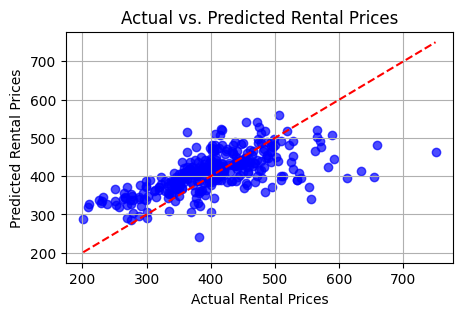

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(5, 3))
plt.scatter(y_test, lm_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.title('Actual vs. Predicted Rental Prices')
plt.xlabel('Actual Rental Prices')
plt.ylabel('Predicted Rental Prices')
plt.grid()
plt.show()


In [13]:
rent_df = pd.read_csv("../data/curated/model_rent_df.csv")
# Fit the model
model = LinearRegression()
model.fit(X, y)
lm_pred = model.predict(df_pred)


lm_predictions = pd.DataFrame()
starting_year=2024

# predict 5 years
for i in range(5):
    # Calculate the start and end index for slicing the predictions array
    start_index = i * 209   # Number of suburbs 
    end_index = start_index + 209 
    

    # Assign the chunk to a new column in the DataFrame
    lm_predictions[f'{starting_year + i}_rent_price'] = lm_pred[start_index:end_index]


rent_df = pd.concat([rent_df, lm_predictions], axis=1)
rent_df.head()

,Unnamed: 0,suburb,postcode,2016_rent_median,2017_rent_median,2018_rent_median,2019_rent_median,2020_rent_median,2021_rent_median,2022_rent_median,2023.5_rent_median,2024_rent_price,2025_rent_price,2026_rent_price,2027_rent_price,2028_rent_price
0,0,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759,556.763219,565.639756,580.166299,588.556892,602.419345
1,1,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759,488.071194,484.787008,494.200166,491.127150,500.337009
2,2,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759,529.664693,537.825109,550.090244,558.262736,570.532767
3,3,Albert Park-Middle Park-West St Kilda,3004.0,515.0,527.75,562.5,568.00,570.00,498.75,510.0,521.503759,490.796562,495.605305,505.288197,509.143011,517.953919
4,4,Armadale,3143.0,402.5,445.00,487.5,481.25,498.75,433.75,447.5,461.685879,488.974755,491.781033,494.639854,497.579837,500.589394


In [14]:
# remove duplicate labels
rent_df = rent_df.loc[:, ~rent_df.columns.duplicated()]
# top 10 growth rate
rent_df['growth_rate_2024'] = (rent_df['2024_rent_price'] - rent_df['2023.5_rent_median']) / rent_df['2023.5_rent_median'] * 100
rent_df['growth_rate_2025'] = (rent_df['2025_rent_price'] - rent_df['2024_rent_price']) / rent_df['2024_rent_price'] * 100
rent_df['growth_rate_2026'] = (rent_df['2026_rent_price'] - rent_df['2025_rent_price']) / rent_df['2025_rent_price'] * 100
rent_df['growth_rate_2027'] = (rent_df['2027_rent_price'] - rent_df['2026_rent_price']) / rent_df['2026_rent_price'] * 100
rent_df['growth_rate_2028'] = (rent_df['2028_rent_price'] - rent_df['2027_rent_price']) / rent_df['2027_rent_price'] * 100
plot_df = rent_df
# Find the maximum growth rate for each suburb
rent_df['max_growth_rate'] = rent_df[['growth_rate_2024', 'growth_rate_2025', 'growth_rate_2026', 'growth_rate_2027', 'growth_rate_2028']].mean(axis=1)
# find mean max_growth_rate for each postcode
rent_df = rent_df.groupby(['postcode', 'suburb']).agg({'max_growth_rate': 'mean'}).reset_index()

# Get the top 10 suburbs with the highest predicted growth rate
top_10_suburbs = rent_df.nlargest(10, 'max_growth_rate')[['suburb', 'postcode', 'max_growth_rate']]

# Print the results
print("Top 10 Suburbs with Highest Predicted Growth Rate:")
top_10_suburbs


Top 10 Suburbs with Highest Predicted Growth Rate:


,suburb,postcode,max_growth_rate
51,Hawthorn,3122.0,12.721404
27,West Brunswick,3055.0,7.631956
82,Prahran-Windsor,3181.0,7.530206
40,Fairfield-Alphington,3078.0,7.211755
85,Elwood,3184.0,6.651157
29,East Brunswick,3057.0,6.403853
30,Broadmeadows-Roxburgh Park,3064.0,6.321335
36,Thornbury,3071.0,6.147849
14,Flemington-Kensington,3031.0,6.007226
64,Malvern East,3145.0,5.995516


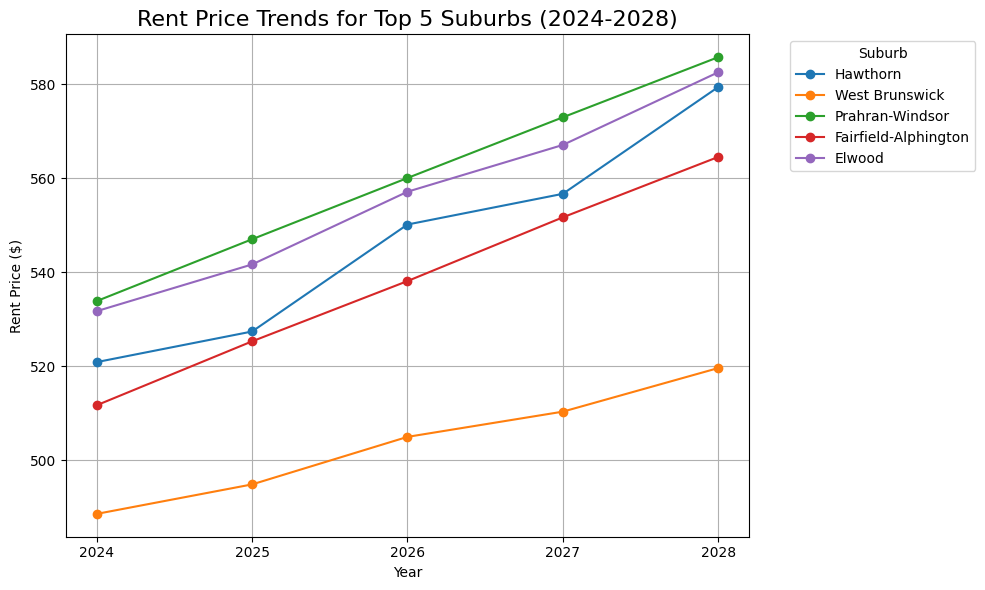

In [15]:
import matplotlib.pyplot as plt

# top 5 suburbs
top_5_suburbs = ['Hawthorn', 'West Brunswick', 'Prahran-Windsor', 'Fairfield-Alphington', 'Elwood']

years = [2024, 2025, 2026, 2027, 2028]

# creat figure
plt.figure(figsize=(10, 6))

# plot
for suburb in top_5_suburbs:
    # take the average of the rent_price data for each suburb
    data = plot_df[plot_df['suburb'] == suburb][['2024_rent_price', '2025_rent_price', '2026_rent_price', '2027_rent_price', '2028_rent_price']].mean().values
    
    # make sure the data dimensions match the year
    if len(data) == len(years):
        plt.plot(years, data, marker='o', label=suburb)
    else:
        print(f"Data for {suburb} does not match years, skipping.")

plt.title('Rent Price Trends for Top 5 Suburbs (2024-2028)', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Rent Price ($)', fontsize=10)
plt.xticks(years)
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


<h2>Random Forest</h2>

In [16]:
# Hyperparamter Tuning
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           scoring='neg_mean_squared_error')  # Use negative MSE for scoring

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive MSE

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
model = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2,random_state=42)
model.fit(X_train, y_train)

# Make Predictions
rf_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Feature Importance
importances = model.feature_importances_
print("Feature Importances:", importances)

Mean Squared Error: 1167.5946102322046
R-squared: 0.8230302521251822
Feature Importances: [0.42709259 0.36170615 0.12837606 0.08282519]


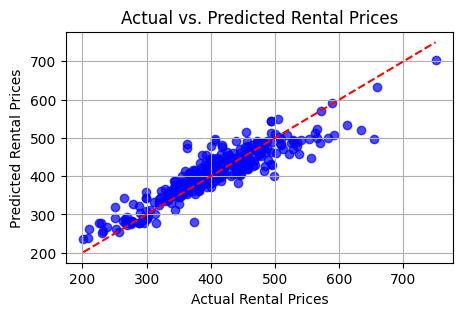

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(5, 3))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45-degree line
plt.title('Actual vs. Predicted Rental Prices')
plt.xlabel('Actual Rental Prices')
plt.ylabel('Predicted Rental Prices')
plt.grid()
plt.show()


In [19]:
# Fit the model
rent_df = pd.read_csv("../data/curated/model_rent_df.csv")

model = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2,random_state=42)
model.fit(X, y)
rg_pred = model.predict(df_pred)


rg_predictions = pd.DataFrame()
starting_year=2024

# Split into 5 year
for i in range(5):
    # Calculate the start and end index for slicing the predictions array
    start_index = i * 209   # Number of suburbs 
    end_index = start_index + 209 
    

    # Assign the chunk to a new column in the DataFrame
    rg_predictions[f'{starting_year + i}_rent_price'] = rg_pred[start_index:end_index]
    rent_df[f'{starting_year + i}_rent_price'] = rg_pred[start_index:end_index]

rg_predictions.head()

,2024_rent_price,2025_rent_price,2026_rent_price,2027_rent_price,2028_rent_price
0,489.671533,489.872894,489.872894,490.081488,488.882302
1,478.878722,489.414084,484.566714,491.377749,486.076328
2,489.079862,490.983635,491.180592,493.619909,491.989994
3,485.811191,480.783556,472.762863,471.829703,472.803633
4,443.266680,442.700999,443.229090,442.569046,442.672085


In [20]:
# remove duplicate labels
rent_df = rent_df.loc[:, ~rent_df.columns.duplicated()]
# top 10 growth rate
rent_df['growth_rate_2024'] = (rent_df['2024_rent_price'] - rent_df['2023.5_rent_median']) / rent_df['2023.5_rent_median'] * 100
rent_df['growth_rate_2025'] = (rent_df['2025_rent_price'] - rent_df['2024_rent_price']) / rent_df['2024_rent_price'] * 100
rent_df['growth_rate_2026'] = (rent_df['2026_rent_price'] - rent_df['2025_rent_price']) / rent_df['2025_rent_price'] * 100
rent_df['growth_rate_2027'] = (rent_df['2027_rent_price'] - rent_df['2026_rent_price']) / rent_df['2026_rent_price'] * 100
rent_df['growth_rate_2028'] = (rent_df['2028_rent_price'] - rent_df['2027_rent_price']) / rent_df['2027_rent_price'] * 100
plot_df = rent_df
# Find the maximum growth rate for each suburb
rent_df['max_growth_rate'] = rent_df[['growth_rate_2024', 'growth_rate_2025', 'growth_rate_2026', 'growth_rate_2027', 'growth_rate_2028']].mean(axis=1)
# find mean max_growth_rate for each postcode
rent_df = rent_df.groupby(['postcode', 'suburb']).agg({'max_growth_rate': 'mean'}).reset_index()

# Get the top 10 suburbs with the highest predicted growth rate
top_10_suburbs = rent_df.nlargest(10, 'max_growth_rate')[['suburb', 'postcode', 'max_growth_rate']]

# Print the results
print("Top 10 Suburbs with Highest Predicted Growth Rate:")
top_10_suburbs


Top 10 Suburbs with Highest Predicted Growth Rate:


,suburb,postcode,max_growth_rate
51,Hawthorn,3122.0,7.710585
136,Moe-Newborough,3825.0,5.797835
40,Fairfield-Alphington,3078.0,4.574923
125,Swan Hill,3585.0,4.185780
115,Horsham,3400.0,4.133101
135,Warragul,3820.0,3.907573
79,Dandenong,3175.0,3.840602
27,West Brunswick,3055.0,3.832279
112,Mount Clear-Buninyong,3350.0,3.592955
111,Ballarat,3350.0,3.514156


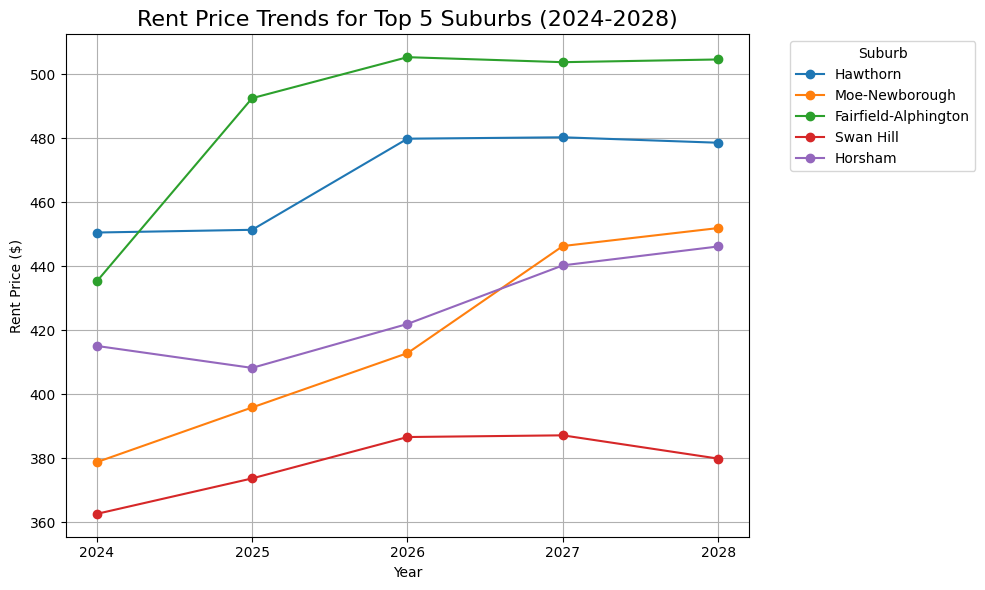

In [21]:
import matplotlib.pyplot as plt

# top 5 suburbs
top_5_suburbs = ['Hawthorn', 'Moe-Newborough', 'Fairfield-Alphington', 'Swan Hill', 'Horsham']

years = [2024, 2025, 2026, 2027, 2028]

# creat figure
plt.figure(figsize=(10, 6))

# plot
for suburb in top_5_suburbs:
    # take the average of the rent_price data for each suburb
    data = plot_df[plot_df['suburb'] == suburb][['2024_rent_price', '2025_rent_price', '2026_rent_price', '2027_rent_price', '2028_rent_price']].mean().values
    
    # make sure the data dimensions match the year
    if len(data) == len(years):
        plt.plot(years, data, marker='o', label=suburb)
    else:
        print(f"Data for {suburb} does not match years, skipping.")

plt.title('Rent Price Trends for Top 5 Suburbs (2024-2028)', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Rent Price ($)', fontsize=10)
plt.xticks(years)
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()
